# Modules and Constants used

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

# 1. Title: _Unveiling Gaussian Secrets_

## Functions 

In [14]:
T_value={ '95':1.96 }


def mean( dataset: np.array, n: int )->float:
  """_Summary_
      This calculates the mean of the dataset which is provided.
  :_Args_
    dataset (np.array): This is the dataset for which the mean is to be calculated.
  :

  """
  summation:float= sum(dataset)
  return (summation/n)

def variance( dataset: np.array, n: int, mean: float )->float:
  """
  _Summary_
    This function calculates and returns the variance of the dataset. 
    :_Args_
      dataset(numpy array): This is the dataset for which the variance is to be calculated.
      n(int): This is the size of the dataset given.

    :_Returns_
      float: Variance of the datset
  """
  squared_dataset= np.array( [ np.power((x-mean), 2) for x in dataset ])
  var= sum(squared_dataset)/n

  return var

def BM_technique( N:int, mean:float, variance:float )->np.array:
  """_Summary_
      This implements the Box-Muller technique to get the dataset which follows the Gaussian Distribution.

    _Args_
      
    
    _Returns_
      np.array: It is the numpy array which contains the data related to the point which follow the Gaussian Distribution.
    
  """
  

  u1= np.random.uniform(0, 1, N)
  u2= np.random.uniform(0, 1, N)

  R= np.sqrt(-2* np.log(u1) )
  cost= np.cos(2 * np.pi * u2 )

  Z= R*cost
  
  X= (Z* np.sqrt(variance)) + mean
  return X

## Introduction

- #### Task 1: We had to generate 10,000 random numbers which follow Gaussian Distribution and exhibit the beauty of Gaussian Fluctuations.

- #### Task 2: Decoding the parameters taken $ \mu $(mean) and $ \sigma $(variance) and understanding them.

- #### Task 3: Finding the expected point, $ \mu $ and checking the level of predictiveness in the sample.

- #### Task 4: Computing a 95% confidence interval for the Normal distribution, finding out the range within which the true mean, μ, lies. Visualizing the findings through a histogram showing the Gaussian fluctuations.

## _Task 1_

### _Methodology_

- #### The main idea behind the method used is to generate a dataset from uniform distribution which follows Gaussian distribution.

- #### This is done with the help of `Box-Muller Technique` which is defined as follows:
  
  - #### It can be defined as a alternative way to inverse transform sampling for the Gaussian Distribution. It generates numbers which follow _Standard Normal Distribution_.
  
  - #### U1 and U2 are the parameters taken for radius and angle which are the samples which follow uniform distribution. Applying the Box-Muller technique makes them follow the normal distribution.
  
  - #### The formulas used for the Box-Muller transform are:
    $$ Z_1 = R\;\cos{(\theta)}\;=\;\sqrt{-2\ln{U_1}} \cos{2\pi U_2}  $$
  
  - #### Z1 follows standard normal distributions.
  
  - #### The derivation for the Box-Muller technique involves the use of geometry and Pythogoras theorem. There are reference given for the Box-Muller technique.

- #### Since we have standard normal distributions below which are independent of each other, We convert them to variables which are dependent on each other.
  $$  X = \mu_1 + \sqrt{ \sigma_1 }\;\;z_1  $$

- #### Finally, the generated dataset is visualized with the help of _Histogram_.

### Code

In [15]:
SIZE1= 10000;  MEAN1= 40;   VAR1= 10

# Creating the dataset following normal distribution
DATA1= BM_technique( SIZE1, MEAN1, VAR1)
DATA1

array([39.07417231, 38.83956993, 43.90218155, ..., 36.66075544,
       37.50352029, 38.30395372])

## _Task 2_

### _Methodology_

- ##### The true mean($ \mu $) and true variance($\sigma$) taken in the above sample are 20 and 10 respectively.

- ##### However, the mean and variance which are exhibited by the sample are slightly different than the original mean and variance which are taken into account. 

- ##### The reason for the above condition is because we have taken a sample which follows the normal distribution.

## _Task 3_

### _Methodology_

- ##### It can be seen in the above histograms that the frequencies of the numbers exhibit a bell-shaped curve.
- ##### The frequencies are negligible after the distance of 10 from the mean as around 99 % of the sample lies in the  $ \mu \pm  3\sigma$.

### _Code_

In [16]:
sample1 ={ 'mean': mean(DATA1, SIZE1 ),  'variance': variance(DATA1, SIZE1, mean(DATA1, SIZE1 ) ) }
           
print(f"The Mean of the sample generated is {sample1['mean']}", end="\n\n")
print(f"The Variance of the sample generated is {sample1['variance']}", end="\n\n")

The Mean of the sample generated is 40.01400454659241

The Variance of the sample generated is 9.991290585456927



## _Task 4_

### _Methodology_

- ##### Here, We compute the 95% confidence interval for the Normal distribution with the help of a pivot variable.

- ##### The pivot variable choosen here follows the t-distribution.
  #####  $$ T = (X − \mu)/( S / \sqrt{n} ) $$

- ##### T follows the t-distribution with (n-1) degrees of freedom. For 0 < α < 1, we deﬁne  $ t_{α/2,n−1} $  to be the upper α/2 critical point of a t-distribution with (n − 1) degrees of freedom i.e., $ α/2 = P (T > t_{α/2,n−1} ) $. Deriving the complete relation, we get:
  #####  $$ 1-\alpha \; = \; P_\mu( \bar{X} \; - \; t_{\alpha/2,n-1}\frac{S}{\sqrt{n}} <  \; \mu \; < \; \bar{X} \; + \; t_{\alpha/2,n-1}\frac{S}{\sqrt{n}} ) \;  $$

- ##### In the above relation, we can get the value for $ \mu $ by putting the value for $ t_{\alpha /2,n-1} $ which is in our case is:
  #####  $$ t_{0.025,9999} \; = 1.96\; $$

### _Code_

In [17]:
limit1= {}

limit1['lower']= sample1['mean'] -  T_value['95']* np.sqrt(sample1['variance']/SIZE1)
limit1['upper']= sample1['mean'] + T_value['95']* np.sqrt(sample1['variance']/SIZE1) 

print(f"The 95% confidence interval is {limit1['lower']} and {limit1['upper']}")

The 95% confidence interval is 39.952050901087816 and 40.075958192097005


### _Visualization_

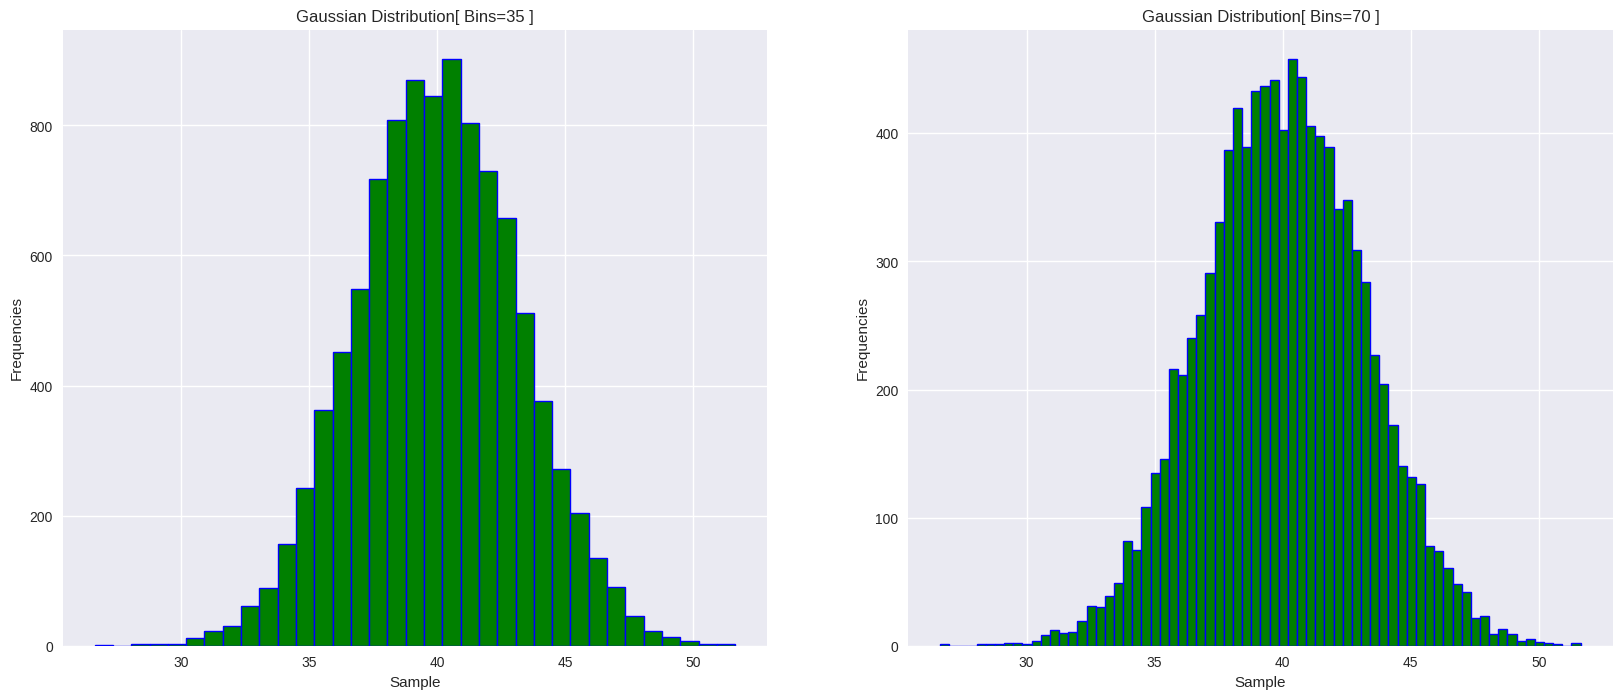

In [18]:
# Options for different bin_Sizes
bin1= (35, 70)

# Adjusting the figure size and the style to be used 
plt.figure( figsize=(20,8))
plt.style.use( 'seaborn-v0_8' )


plt.subplot(1,2,1)
plt.title(f"Gaussian Distribution[ Bins={ bin1[0] } ]")
plt.xlabel("Sample"); plt.ylabel("Frequencies")
plt.hist(DATA1, color="green", bins= bin1[0], linewidth=1, edgecolor="blue")

# Changing the bin-size
plt.subplot(1,2,2)
plt.title(f"Gaussian Distribution[ Bins={ bin1[1] } ]")
plt.xlabel("Sample"); plt.ylabel("Frequencies")
plt.hist(DATA1, color="green", bins= bin1[1], linewidth=1, edgecolor="blue")


# Showing the histogram
plt.show()

## _Observations_

- #### Below, I have defined the 10 observations for the lower and upper 95% confidence values.
  | Index | Lower Bound on $ \mu $ | Upper Bound on $ \mu $ |
  | --- | --- | ---|
  | 1. | 39.90 | 40.02 |
  | 2. | 39.92 | 40.04 |
  | 3. | 39.94 | 40.07 |
  | 4. | 39.93 | 40.06 |
  | 5. | 39.88 | 40.01 |
  | 6. | 39.93 | 40.06 |
  | 7. | 39.92 | 40.05 |
  | 8. | 39.95 | 40.08 |
  | 9. | 39.99 | 40.19 |
  | 10. | 39.93 | 40.05 |

- #### Through the above observations, we can see that most of the our confidence interval is correct for the value of $ \mu $.

- #### However, there have been cases where the confidence interval has not been able to infer the correct range for the value of true mean.

## _Result_

- ##### Finally, We can infer from this that the 95% confidence interval decided provides us with a almost correct range for the value of $$

# 2. _Title: The Poisson Generator_

## Functions used

In [19]:
# -------------------------------------------------------  UNIVARIATE  -----------------------------------------------------------------

# Function which follows altered cdf of Poisson distribution
def changed_Poisson(X:int, lamda:int)->float:
	"""This is a function which returns the poission distribution."""

	f_x = ( (lamda**X)/mt.factorial(X) )
	return f_x

# Function which follows the altered cdf of Poisson distribution
def Poisson_cdf( lim:int , LAMDA:int )->np.array:
  """_summary_

  Args:
      lim (int): This is the limit upto which the numpy array is to be made

  Returns:
      np.array: This is the numpy array which has the index number as the realisation of the random variable and the value in the array as the cdf upto that value.

  It returns an array which contains the cdf value for the (index + 1) range.
  """

  arr =[ 0 ]
  for i in range(1,lim,1):
    arr.append( arr[i-1] + changed_Poisson(i,LAMDA) )
  cdf=np.array(arr)
  
  return cdf

# Function which works as the inverse for the Poisson distribution
def Poisson_value( cdf:np.array, prob:float ,lamda:int )->int:
  """_summary_

  Args:
    cdf (np.array): This is the cdf array for a particular distribution.
    prob (float): This is an specific probability value which is in the range of 0 to 1. 

  Returns:
    int: This is the realisation of the random variable.
  """

  sz: int =len(cdf)
  for i in range(sz):
    if( prob/mt.exp(0-lamda) < cdf[i]):
      return i
    
  return 0

# Function which gives randomly generated numbers which follow gaussian distribution
def ITS_poisson( num_samples:int, prestored_samples:int, lamda:int )->np.array:
  """_Summary_
  
  Args:
    num_samples (int): This is the toal number of samples taken for the transformation from uniform to gaussian function.
    prestored_samples (int): This is the total number of prestored samples taken.
    lamda (int): This is the lamda taken for the gaussian distribution.

  Returns:
    np.array: This is the array which contains the transformed uniform random number which now follow normal/gaussian distribution 
  """
  
  CAL= Poisson_cdf( prestored_samples ,lamda )
  
  # Generating uniform random numbers
  dp: np.array = np.random.uniform(0, 1, num_samples)
  dataset:np.array = np.array( [ Poisson_value(CAL,i,lamda) for i in dp ] )
  
  return dataset

## Introduction

- ##### Task 1: Generate 10,000 random samples using the Poisson distribution. $ \lambda $ represents the average rate of events per interval.

- ##### Task 2: Calculating the expected point, the mean of the generated dataset and giving a brief about the insights which is obtained about the central tendency of the dataset.

- ##### Task 3: Finding the 95% confidence interval for the Poisson distribution. Uncovering the range within which the true mean lies.

- ##### Task 4: Visualising the Poisson distribution using a histogram. Noting the observation and insights obtained during the process.

## _Task 1_

### _Methodology_

- #### The main idea used here is to get the cdf of random variable for a large number of realisations of the random variable `X` which follows the Poisson distibution.

- #### The Poisson distribution can be represented by the pmf as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}\;e^{-\lambda}}{x!}  $$

- #### However for the ease of calculation, we have altered the pmf slightly by taking the it as:
#### $$  P(x,\lambda)\;=\;\frac{\lambda^{x}}{x!}  $$

- #### The extra `exponential term` has been added while taking the probability as the input.

- #### In the code mentioned below, the functions pertaining to each task has been documented in a well-defined manner.

- #### The interesting fact here is that the Poisson distribution becomes more-and-more similar to Normal distribution as the value of $ \lambda $ increases. 

- #### The value of $ \lambda $ taken here by me is 10. Even from this value, we can see that the poisson distribution starts to resemble the normal distribution.

### Code

In [1]:
"""
Initially the range of the values was limited to 34 due to the huge computation overheads and datatype overflow, however changing the way we evaluate the cdf can increase the limit of the function.
"""

# Earlier the Upper range of the limit is 171
prestored_samples2 =2000

LAMDA2= 100;            SIZE2= 10000

# Generating the cdf of the gaussian distribution
CDF2 =  Poisson_cdf( prestored_samples2, LAMDA2)* mt.exp(0-LAMDA2)

# Generating the dataset
DATA2= ITS_poisson( SIZE2, prestored_samples2, LAMDA2)

NameError: name 'Poisson_cdf' is not defined

## _Task 2_

### _Methodology_

- ##### The mean of the Poisson dataset generated is near to the value of $ \lambda $ which we have taken into consideration.

- ##### After that, we simply calculate the mean of the dataset by using the self-built method `mean` for the task.

- ##### This gives us the insight that the method of Inverse Transform Sampling which we have used for the Variable is correct and it works which can be proved by the fact that both the mean and variance come out to be close to 10.

- ##### The above fact is, also the property of the Poisson distribution.

### _Code_

In [21]:
mean2:float = mean( DATA2, SIZE2 )
var2:float = variance( DATA2 , SIZE2, mean2 )

# Displaying the necessaary information
print(f"The mean of the dataset is {mean2}.",end="\n\n")
print(f"The variance of the dataset is {var2}.",end="\n\n")

The mean of the dataset is 99.9268.

The variance of the dataset is 96.55864175999977.



## _Task 3_

### _Methodology_

- #### We know in this case that the distribution is not normal. With the help of Central Limit Thorem, the value can be approximated to N (0, 1). 
  ####  $$ 1-\alpha \; \approx  \; P_{\mu}( −z_{α/2} < \frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}} }< z_{α/2}) $$
  ####  $$ 1-\alpha \; \approx  \; P_{\mu}( \; \bar{X} − z_{α/2}\frac{S}{\sqrt{n}} < \mu< \bar{X} + z_{α/2}\frac{S}{\sqrt{n}} \; ) $$

- #### The value $ \bar{x} $ and s denote the realized values of the statistics $ \bar{X} $ and S, an approximate (1 − α)100% conﬁdence interval for μ is given by the range:
  ####  $$ ( \; \bar{X} − z_{α/2}\frac{S}{\sqrt{n}} \; , \; \bar{X} + z_{α/2}\frac{S}{\sqrt{n}} \; ) $$

### _Code_

In [22]:
z_alpha= 1.97

limit2= {}

limit2['lower']= mean2 -  z_alpha * np.sqrt(var2/SIZE2)
limit2['upper']= mean2 + z_alpha * np.sqrt(var2/SIZE2) 

print(f"The 95% confidence interval is {limit2['lower']} and {limit2['upper']}")

The 95% confidence interval is 99.73321941398828 and 100.12038058601172


## _Task 4_

### _Methodology_

- #### The visualization is simply obtained by the use of `matplotlib` library in python. 

### _Code_

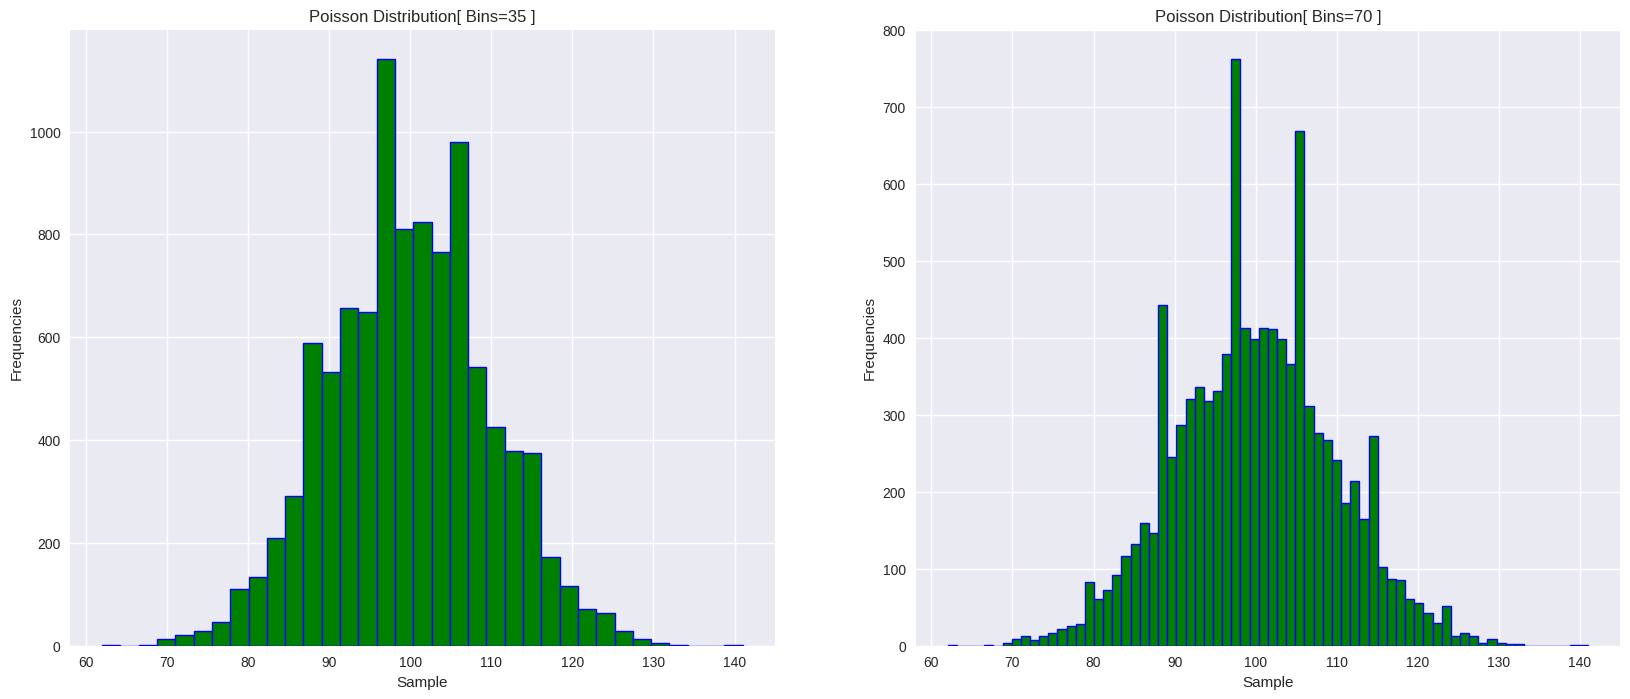

In [23]:
# Options for different bin_Sizes
bin1= (35, 70)

# Adjusting the figure size and the style to be used 
plt.figure( figsize=(20,8))
plt.style.use( 'seaborn-v0_8' )


plt.subplot(1,2,1)
plt.title(f"Poisson Distribution[ Bins={ bin1[0] } ]")
plt.xlabel("Sample"); plt.ylabel("Frequencies")
plt.hist( DATA2, color="green", bins= bin1[0], linewidth=1, edgecolor="blue")

# Changing the bin-size
plt.subplot(1,2,2)
plt.title(f"Poisson Distribution[ Bins={ bin1[1] } ]")
plt.xlabel("Sample"); plt.ylabel("Frequencies")
plt.hist( DATA2, color="green", bins= bin1[1], linewidth=1, edgecolor="blue")


# Showing the histogram
plt.show()

## _Observations_

- #### The first observation here is that we can see in the visualization that for large values of $ \lambda $, the Poisson distribution becomes indistiguisable from the Normal distribution.

- #### This is evident from the function of the Poisson distribution as when we increase the value for $ \lambda $, the distribution will tend towards normal.

- #### Additionally, we can see that the confidence interval provides us with the correct values most of the time.

## _Results_ 

- #### We can see that the technique for the finding the confidence interval for the Poisson distribution can be applied for Poisson distribution as well by the application of Central Limit Theorem.

- #### This makes the point that we can find the confidence interval for any distribution with some level of approximation.


# _3. Word Problem_

## _Introduction_

- #### A market researcher is conducting a study to estimate the proportion of customers who are satisfied with a new product launch. It is assumed that the quality of her sample is such that it can be safely assumed to be a random sample from the Bernoulli distribution with the unknown parameter p.
- #### The researcher wants to determine the smallest sample size (n) needed to estimate the satisfaction proportion with ±3% accuracy, at a 99% confidence level. The estimator for the proportion is given by $ \hat{p} = \frac{Y}{n} $ , where Y is the number of satisfied customers in the sample.
- #### We have assumed that the sampling distribution of $ \hat{p} $ is well approximated by a normal distribution, and the task is to find the smallest sample size (n) under the given conditions.

## Methodology

- #### We know in this case that the distribution is not normal. However, from the above discussion we know that the distribution of Zn , (4.2.4), is approximately N (0, 1). 
  ####  $$ 1-\alpha \; \approx  \; P_{\mu}( −z_{α/2} < \frac{\bar{X}-\mu}{\frac{S}{\sqrt{n}} }< z_{α/2}) $$
  ####  $$ 1-\alpha \; \approx  \; P_{\mu}( \; \bar{X} − z_{α/2}\frac{S}{\sqrt{n}} < \mu< \bar{X} + z_{α/2}\frac{S}{\sqrt{n}} \; ) $$

- #### The value $ \bar{x} $ and s denote the realized values of the statistics $ \bar{X} $ and S, an approximate (1 − α)100% conﬁdence interval for μ is given by the range:
  ####  $$ ( \; \bar{X} − z_{α/2}\frac{S}{\sqrt{n}} \; , \; \bar{X} + z_{α/2}\frac{S}{\sqrt{n}} \; ) $$

- #### For the 99% confidence interval, the $ z_{\alpha/2}= 2.58 $, we can use the formula for the margin of error in estimating a proportion:
  #### $$ e = z\sqrt{\frac{p(1−p)}{n}} $$

- #### From the above expression, we can derive the term for the smallest sample size n which will at least give a 99% confidence interval with a margin error of 0.03
  #### $$ n = \frac{p(1-p)}{(\frac{e}{z})^2} $$
​

## _Code_

In [24]:
e= 0.03;  z= 2.58; p=0.5

n= (p*(1-p)) / (e/z)**2
n

1849.0000000000002

## _Obsevations_

- #### We can see that the minimum value of  n has come out to be 1849.

- #### We got this by taking the margin of error to be 0.03 i.e. 3%.

- #### We took the value of p to be equal to 0.5 which supports the fact for maximum randomness.

## _Results_

- #### We can confirm now that the value for n is minimum for the given conditions.

# References

- #### [Help in Markdown](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index)
- #### [Box-Muller Technique](https://www.statisticshowto.com/box-muller-transform-simple-definition/)